Problem : Cardiovascular diseases are one of the leading causes of death worldwide. Early prediction and diagnosis of heart disease can help in timely treatment and prevention. Medical professionals often rely on various health metrics such as age, blood pressure, cholesterol levels, and chest pain type to assess the risk of heart disease in patients.

Goal : to build a machine learning model that can accurately predict the presence of heart disease in a patient based on several medical attributes.

## 1. Importing Required Libraries

We import essential libraries for data manipulation, visualization, and building our logistic regression model.
Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## 2. Loading the Dataset

We load the dataset containing medical records and information about heart disease status.
Loading dataset and initial checks

In [2]:
df=pd.read_csv(r"data.csv")
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 3. Target Distribution

Let’s visualize the class distribution to understand how many patients have heart disease vs those who don't.

C:\Users\abhay\AppData\Local\Temp\ipykernel_26088\2834924627.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set2')


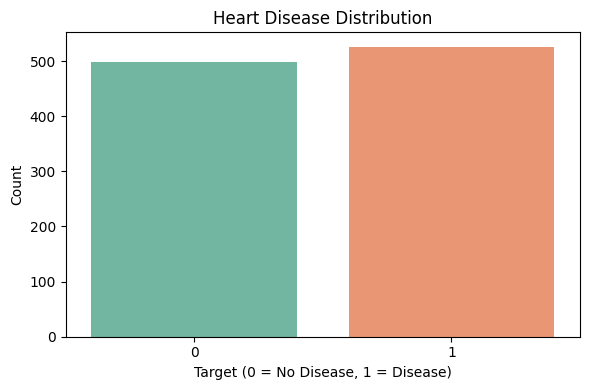

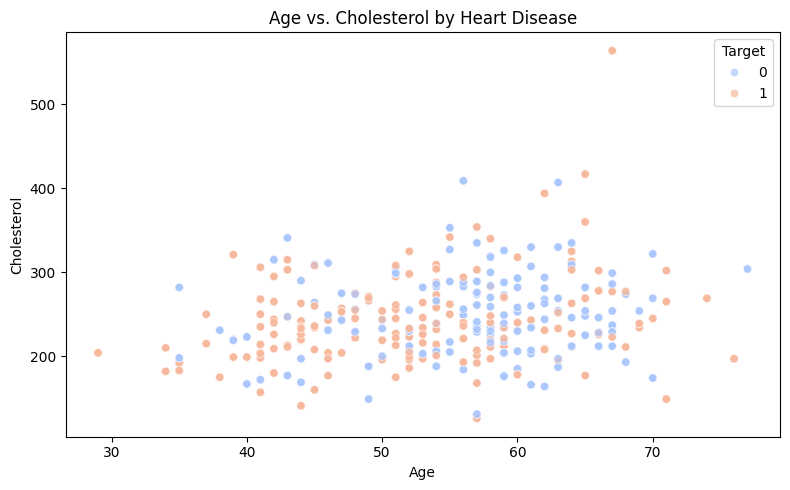

<Axes: >

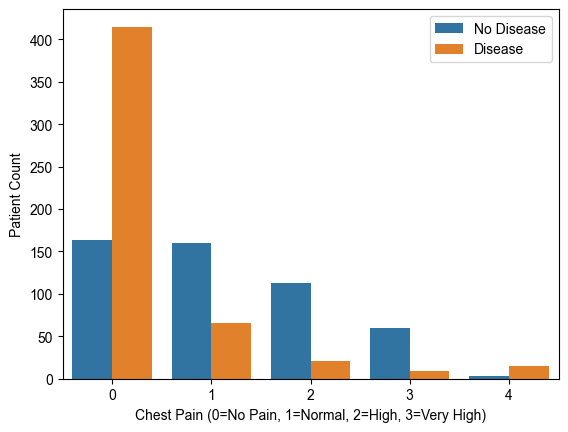

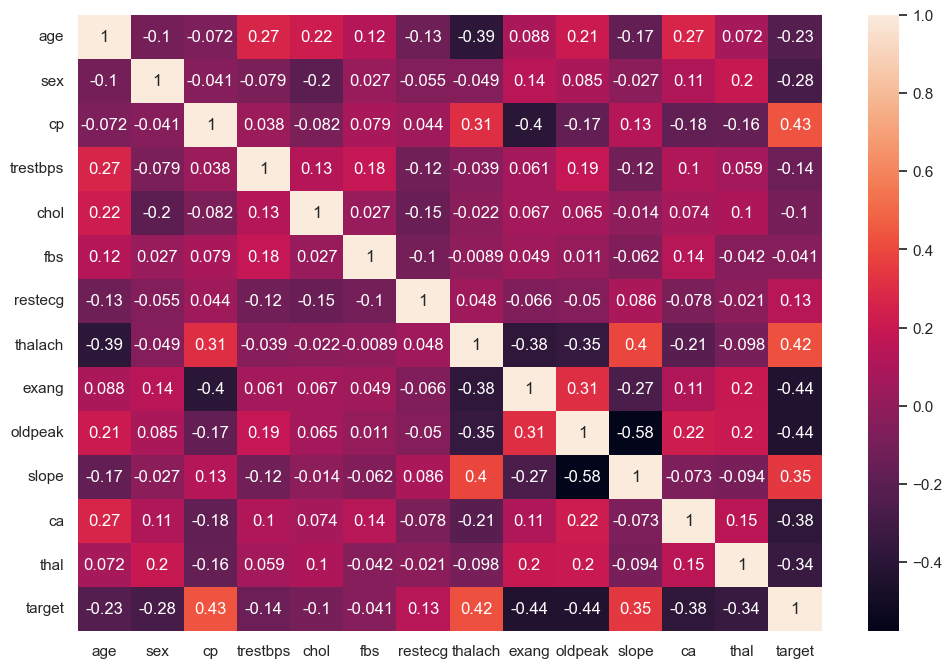

In [4]:
# 1. Disease distribution (target countplot)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target', palette='Set2')
plt.title('Heart Disease Distribution')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2. Age vs. Cholesterol (with hue = Disease)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='age', y='chol', hue='target', palette='coolwarm', alpha=0.7)
plt.title('Age vs. Cholesterol by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Target')
plt.tight_layout()
plt.show()

# 3. Chest Pain vs Disease
sns.countplot(x='ca', hue='target', data=df)
plt.xlabel("Chest Pain (0=No Pain, 1=Normal, 2=High, 3=Very High)")
plt.ylabel("Patient Count")
plt.legend(labels=['No Disease', 'Disease'])

# 4. Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(corr_matrix, annot = True)

## 4. Train-Test Split & Model Training

We split the dataset into training and testing sets in a 60:40 ratio to evaluate the model's performance on unseen data then we use logistic regression for binary classification. Logistic regression is selected for its simplicity and interpretability in healthcare applications.


Accuracy: 85.1219512195122
Precision: 84.32203389830508
Recall: 89.23766816143498
F1 Score: 86.71023965141612


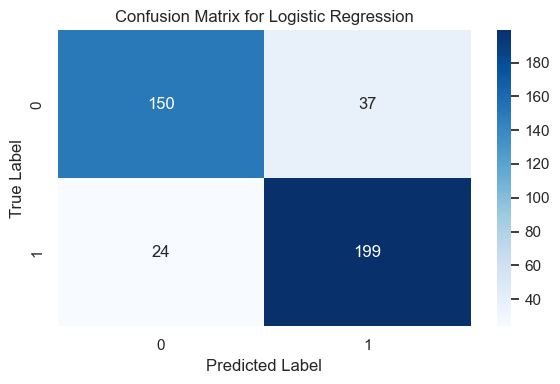

In [5]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=41)

model = LogisticRegression(max_iter=1500)
model.fit(X_train, y_train)

name='model.joblib'
joblib.dump(model,name)

y_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred)*100)
print("Precision:",precision_score(y_test, y_pred)*100)
print("Recall:",recall_score(y_test, y_pred)*100)
print("F1 Score:",f1_score(y_test, y_pred)*100)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.tight_layout()
plt.show()

## 5. Model Evaluation & Confusion Matrix

We evaluate the model using the following metrics:
- Accuracy
- Precision
- Recall
- F1-score

These metrics give a complete picture of the model’s performance, especially in detecting actual disease cases (recall).

The confusion matrix helps us understand the model's predictions in terms of true positives, false positives, true negatives, and false negatives.


Accuracy: 85.12 %
Precision: 84.32 %
Recall: 89.24 %
F1 Score: 86.71 %


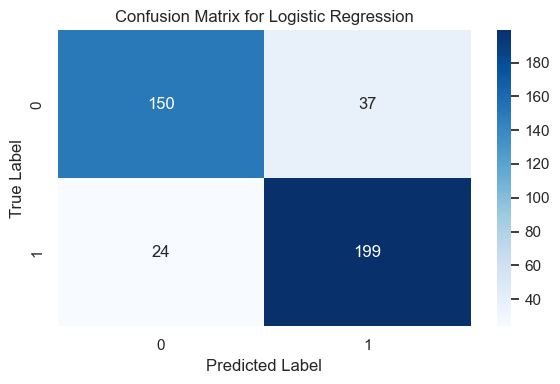

In [6]:
y_pred = model.predict(X_test)
print("Accuracy:",round(accuracy_score(y_test, y_pred)*100,2),"%")
print("Precision:",round(precision_score(y_test, y_pred)*100,2),"%")
print("Recall:",round(recall_score(y_test, y_pred)*100,2),"%")
print("F1 Score:",round(f1_score(y_test, y_pred)*100,2),"%")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.tight_layout()
plt.show()

In this project, we developed a basic machine learning model to predict the presence of cardiovascular disease using a dataset sourced from Kaggle. Since the dataset was already clean and well-structured, minimal data preprocessing was required.

The model's performance was assessed using metrics such as accuracy, precision, recall, and F1-score. This project demonstrates the complete machine learning workflow — from importing the dataset to evaluating the model's performance.

Overall, it highlights how data science can play a vital role in the healthcare industry by enabling early diagnosis of potentially life-threatening diseases.